# BGS selection figure for SV overview paper

In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
from tqdm.notebook import tqdm, trange

In [2]:
from desitarget import cuts as desi_cuts

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
!pip install corner --user
import corner as DFM

In [5]:
ls_S_dir = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0'
ls_N_dir = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0'
#ls_S_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper'
#ls_N_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper'

cat_S = atable.Table.read(os.path.join(ls_S_dir, 'sweep-200p005-210p010.fits'))
cat_N = atable.Table.read(os.path.join(ls_N_dir, 'sweep-190p040-200p045.fits'))

In [6]:
cat_S['PHOTSYS'] = 'S'
cat_N['PHOTSYS'] = 'N'

In [7]:
def BGS_quality_mask(targets, south=True):
    ''' apply BGS quality cut and imaging mask
    '''
    photsys_north, photsys_south, obs_rflux, gflux, rflux, zflux,                 \
    w1flux, w2flux, gfiberflux, rfiberflux, zfiberflux,                           \
    gfibertotflux, rfibertotflux, zfibertotflux,                                  \
    objtype, release, ra, dec, gfluxivar, rfluxivar, zfluxivar, w1fluxivar,       \
    gnobs, rnobs, znobs, gfracflux, rfracflux, zfracflux,                         \
    gfracmasked, rfracmasked, zfracmasked,                                        \
    gfracin, rfracin, zfracin, gallmask, rallmask, zallmask,                      \
    gsnr, rsnr, zsnr, w1snr, w2snr, dchisq, deltaChi2, maskbits, refcat = desi_cuts._prepare_optical_wise(objects=targets, mask=True)

    gaia, pmra, pmdec, parallax, parallaxovererror, parallaxerr, gaiagmag, \
    gaiabmag, gaiarmag, gaiaaen, gaiadupsource, Grr, gaiaparamssolved, \
    gaiabprpfactor, gaiasigma5dmax, galb = desi_cuts._prepare_gaia(objects=targets, colnames=None)

    bgs = np.ones_like(gnobs, dtype='?')    
    bgs &= (gnobs >= 1) & (rnobs >= 1) & (znobs >= 1)
    bgs &= (gfluxivar > 0) & (rfluxivar > 0) & (zfluxivar > 0)
    
    # ADM geometric masking cuts from the Legacy Surveys.
    # BRIGHT & CLUSTER for BGS
    bgs &= desi_cuts.imaging_mask(maskbits, bgsmask=True)

    return bgs

In [8]:
qm_S = BGS_quality_mask(cat_S, south=True)
qm_N = BGS_quality_mask(cat_N, south=True)

In [9]:
optw_S = desi_cuts._prepare_optical_wise(objects=cat_S, mask=True)
optw_N = desi_cuts._prepare_optical_wise(objects=cat_N, mask=True)

gaia_S = desi_cuts._prepare_gaia(objects=cat_S, colnames=None)
gaia_N = desi_cuts._prepare_gaia(objects=cat_N, colnames=None)

In [10]:
rfib_S = 22.5 - 2.5 * np.log10(optw_S[9].clip(1e-16))
gmag_S = 22.5 - 2.5 * np.log10(optw_S[3].clip(1e-16))
rmag_S = 22.5 - 2.5 * np.log10(optw_S[4].clip(1e-16))
zmag_S = 22.5 - 2.5 * np.log10(optw_S[5].clip(1e-16))
w1_S = 22.5 - 2.5 * np.log10(optw_S[6].clip(1e-16))

gaia_g_S = gaia_S[6]
G_rr_S = gaia_S[11]

rfib_N = 22.5 - 2.5 * np.log10(optw_N[9].clip(1e-16))
gmag_N = 22.5 - 2.5 * np.log10(optw_N[3].clip(1e-16))
rmag_N = 22.5 - 2.5 * np.log10(optw_N[4].clip(1e-16))
zmag_N = 22.5 - 2.5 * np.log10(optw_N[5].clip(1e-16))
w1_N = 22.5 - 2.5 * np.log10(optw_N[6].clip(1e-16))

gaia_g_N = gaia_N[6]
G_rr_N = gaia_N[11]

In [11]:
def BGS_sample(targets, south=True, targtype='bright'):
    ''' apply BGS quality cut and imaging mask
    '''
    photsys_north, photsys_south, obs_rflux, gflux, rflux, zflux,                 \
    w1flux, w2flux, gfiberflux, rfiberflux, zfiberflux,                           \
    gfibertotflux, rfibertotflux, zfibertotflux,                                  \
    objtype, release, ra, dec, gfluxivar, rfluxivar, zfluxivar, w1fluxivar,       \
    gnobs, rnobs, znobs, gfracflux, rfracflux, zfracflux,                         \
    gfracmasked, rfracmasked, zfracmasked,                                        \
    gfracin, rfracin, zfracin, gallmask, rallmask, zallmask,                      \
    gsnr, rsnr, zsnr, w1snr, w2snr, dchisq, deltaChi2, maskbits, refcat = desi_cuts._prepare_optical_wise(objects=targets, mask=True)

    gaia, pmra, pmdec, parallax, parallaxovererror, parallaxerr, gaiagmag, \
    gaiabmag, gaiarmag, gaiaaen, gaiadupsource, Grr, gaiaparamssolved, \
    gaiabprpfactor, gaiasigma5dmax, galb = desi_cuts._prepare_gaia(objects=targets, colnames=None)

    bgs = desi_cuts.isBGS(
            gflux=gflux, rflux=rflux, zflux=zflux, w1flux=w1flux, w2flux=w2flux, rfibertotflux=rfibertotflux,
            rfiberflux=rfiberflux, gnobs=gnobs, rnobs=rnobs, znobs=znobs,
            gfluxivar=gfluxivar, rfluxivar=rfluxivar, zfluxivar=zfluxivar,
            maskbits=maskbits, Grr=Grr, refcat=refcat, w1snr=w1snr, w2snr=w2snr, gaiagmag=gaiagmag,
            objtype=objtype, primary=None, south=south, targtype=targtype)
    return bgs

In [12]:
bgs_bright_S = BGS_sample(cat_S, south=True, targtype='bright')
bgs_bright_N = BGS_sample(cat_N, south=False, targtype='bright')

In [13]:
bgs_faint_S = BGS_sample(cat_S, south=True, targtype='faint')
bgs_faint_N = BGS_sample(cat_N, south=False, targtype='faint')

In [14]:
is_galaxy_S = (G_rr_S > 0.6) | (gaia_g_S == 0)
is_galaxy_N = (G_rr_N > 0.6) | (gaia_g_N == 0)
print(np.mean(is_galaxy_S), np.mean(is_galaxy_N))

0.9590894083210405 0.9588036084045856


In [20]:
fibcol_S = (zmag_S - w1_S) - 3/2.5 * (gmag_S - rmag_S) + 1.2
fibcol_N = (zmag_N - w1_N) - 3/2.5 * (gmag_N - rmag_N) + 1.2

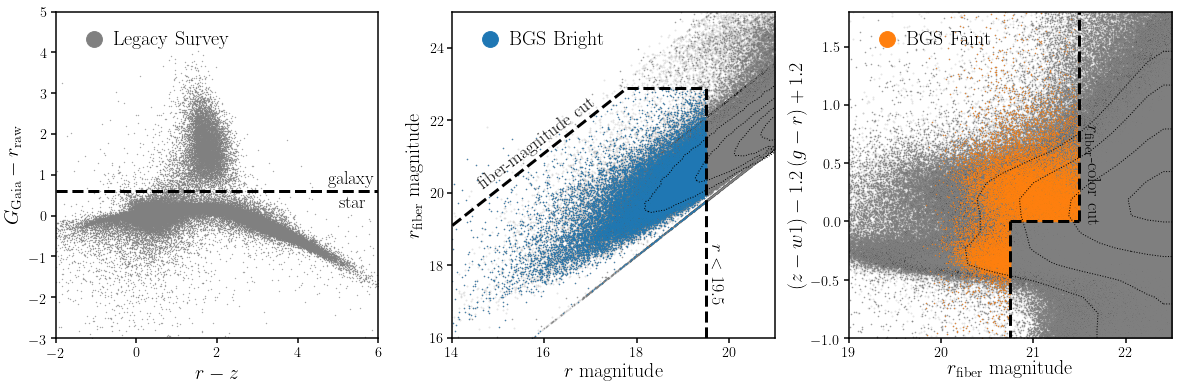

In [40]:
fig = plt.figure(figsize=(20,6))

sub = fig.add_subplot(131)
sub.scatter((gmag_S - zmag_S), G_rr_S, c='gray', s=0.1, rasterized=True)
sub.scatter((gmag_N - zmag_N), G_rr_N, c='gray', s=0.1, rasterized=True)
sub.scatter([], [], c='gray', s=0.1, label='Legacy Survey')

sub.text(5.9, 0.69, 'galaxy', ha='right', va='bottom', fontsize=18)
sub.text(5.7, 0.5, 'star', ha='right', va='top', fontsize=18)
sub.axhline(0.6, color='k', linestyle='--', linewidth=3)

#sub.text(0.95, 0.05, r'Legacy Survey', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)
sub.legend(loc='upper left', fontsize=20, handletextpad=0, markerscale=50)
sub.set_xlabel(r'$r - z$', fontsize=20) 
sub.set_ylabel(r'$G_{\rm Gaia} - r_{\rm raw}$', fontsize=20) 
sub.set_xlim(-2., 6.)
sub.set_xticks([-2., 0., 2., 4., 6.])
sub.set_ylim(-3., 5.)

sub = fig.add_subplot(132)
DFM.hist2d(np.concatenate([rmag_S[is_galaxy_S], rmag_N[is_galaxy_N]]), 
           np.concatenate([rfib_S[is_galaxy_S], rfib_N[is_galaxy_N]]), 
           range=[(14, 21), (16, 25)], color='k', 
           plot_density=False, plot_datapoints=True, no_fill_contours=True, 
           bins=200, smooth=True, 
           contour_kwargs={'linewidths': 1, 'linestyles': ':'}, 
           ax=sub)
sub.scatter(rmag_S[is_galaxy_S], rfib_S[is_galaxy_S], c='gray', s=0.1, rasterized=True)
#sub.scatter(rmag_N[is_galaxy_N], rfib_N[is_galaxy_N], c='gray', s=0.1, rasterized=True)
sub.scatter(rmag_S[bgs_bright_S], rfib_S[bgs_bright_S],  c='C0', s=0.1, rasterized=True, label='BGS Bright')
#sub.scatter(rmag_N[bgs_bright_N], rfib_N[bgs_bright_N],  c='C0', s=0.1, rasterized=True)

sub.legend(loc='upper left', fontsize=20, handletextpad=0, markerscale=50)
sub.text(14.5, 20.1, 'fiber-magnitude cut', rotation=37, fontsize=18)
sub.plot([14, 17.8], [19.1, 22.9], c='k', ls='--', lw=3)
sub.plot([17.8, 19.5], [22.9, 22.9], c='k', ls='--', lw=3)

sub.text(19.55, 17., '$r < 19.5$', rotation=270, fontsize=18)
sub.plot([19.5, 19.5], [16., 22.9], c='k', ls='--', lw=3)

sub.set_xlabel(r'$r$ magnitude', fontsize=20)
sub.set_xticks([14, 16, 18, 20])
sub.set_ylabel(r'$r_{\rm fiber}$ magnitude', fontsize=20) 
sub.set_xlim(14, 21)
sub.set_ylim(16, 25)
sub.set_yticks([16, 18, 20, 22, 24])

sub = fig.add_subplot(133)
sub.scatter(rfib_S[is_galaxy_S], fibcol_S[is_galaxy_S], c='gray', s=0.1, rasterized=True)
#sub.scatter(rfib_N[is_galaxy_N] - 0.04, fibcol_N[is_galaxy_N], c='gray', s=0.1, rasterized=True)
DFM.hist2d(np.concatenate([rfib_S[is_galaxy_S], rfib_N[is_galaxy_N] - 0.04]), 
           np.concatenate([fibcol_S[is_galaxy_S], fibcol_N[is_galaxy_N]]), 
           range=[(19.0, 22.5), (-1., 1.8)], color='k', 
           plot_density=False, plot_datapoints=True, no_fill_contours=True, 
           smooth=True, 
           contour_kwargs={'linewidths': 1, 'linestyles': ':'}, 
           ax=sub)
sub.scatter(rfib_S[bgs_faint_S], fibcol_S[bgs_faint_S], c='C1', s=0.1, rasterized=True, label='BGS Faint')

sub.legend(loc='upper left', fontsize=20, handletextpad=0, markerscale=50)
sub.plot([20.75, 20.75], [-2, 0.], c='k', ls='--', lw=3)
sub.plot([20.75, 21.5], [0., 0.], c='k', ls='--', lw=3)
sub.plot([21.5, 21.5], [0., 2.], c='k', ls='--', lw=3)
sub.text(21.52, 0., r'$r_{\rm fiber}$-color cut', rotation=270, fontsize=18)

sub.set_xlabel(r'$r_{\rm fiber}$ magnitude', fontsize=20) 
sub.set_ylabel(r'$(z - w1) - 1.2\,(g - r) + 1.2$', fontsize=20) 
sub.set_yticks([-1., -0.5, 0., 0.5, 1., 1.5])
sub.set_ylim(-1., 1.8)
sub.set_xlim(19.0, 22.5)
sub.set_xticks([19., 20, 21, 22])

fig.subplots_adjust(wspace=0.23)
fig.savefig('figs/bgs_select_overview.pdf', bbox_inches='tight')